<a href="https://colab.research.google.com/github/ayannj13/Data-Science/blob/main/Homework5_AyanJamal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#For this homework, use following data. Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
#The Lead dataset is designed for a binary classification task,
#where the target variable is Converted (indicating whether a lead converted to customer, with values 0 or 1).
#The other columns are features that describe the lead's characteristics, behavior, and interactions.
#The explanation of the columns are given below.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

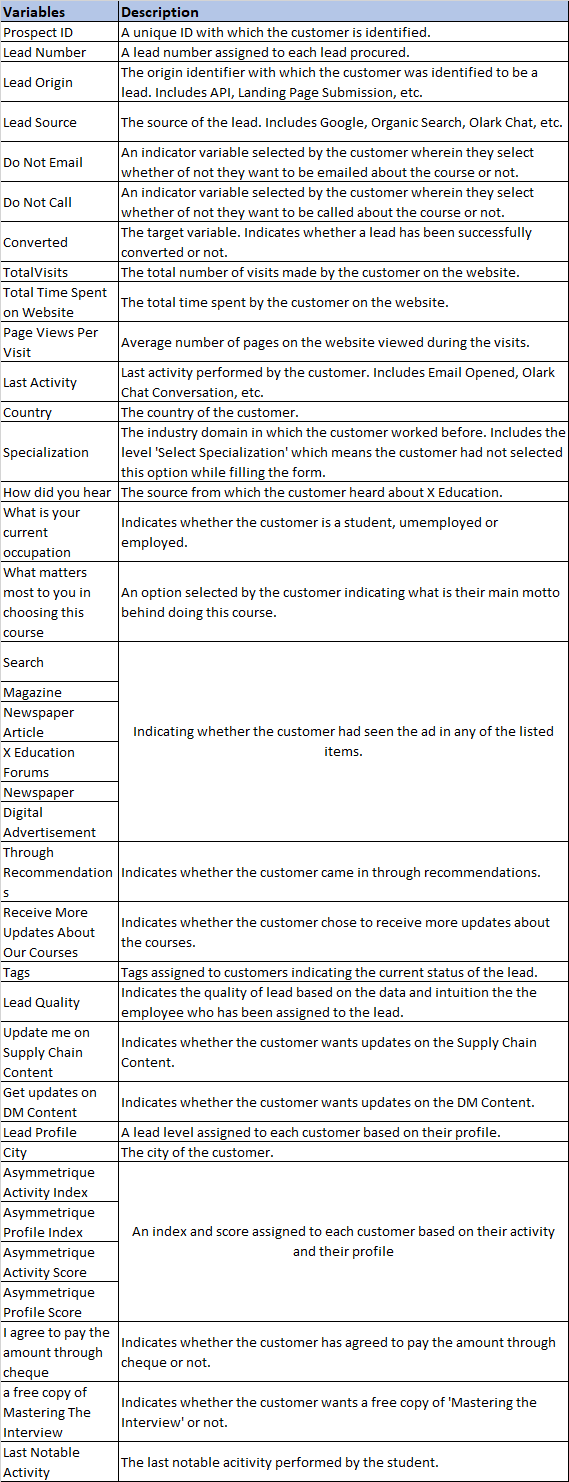

In [ ]:
#Q1 (15 pt) -There are missing values in the Lead data.
#Replace missing values with the mean if the variable is numeric and  with the mode if the variable is categorical.
#Note: If the data type (Dtype) is object, the variable is categorical and
#if the data type (Dtype) is int64 or float64, the variable is numerical.

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0


Label encoding is a technique used in machine learning to convert categorical data into numerical format. Each unique category value is assigned an integer value. For example, if you have a categorical feature like "color" with values "red," "green," and "blue," label encoding might transform these into 0, 1, and 2, respectively. This is useful because many machine learning algorithms require numerical input. However, it can imply an ordinal relationship where none exists, which might not be appropriate for all datasets.

When to Use

Use label encoding for ordinal data or tree-based models.

Use dummy variables for nominal data or models sensitive to ordinal assumptions such as linear regression

In [ ]:
#Q2-(15 pt)Convert categorical variables to numerical with label encoder method .
#Drop Prospect ID,	Lead Number  and Converted from the input variables and use Converted as target variables.
#Split data into train and test using 30% of the data

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Drop ID columns and isolate target variable
X = df.drop(['Prospect ID', 'Lead Number', 'Converted'], axis=1)
y = df['Converted']

# 2. Label encode all categorical columns
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

# 3. Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [ ]:
#Q3(10 pt) Assuming Converted = 1 represents the positive case (i.e., a lead converts into a customer),
# define what is false positive and false negative in this dataset?
#Which one is more important  metric (precison or recall) in this case? Why?

**Q3:**

In this dataset, the target variable Converted shows whether a lead became a customer or not. If the value is 1, it means the lead converted into a customer, so this is the positive case. If it's 0, it means the lead didn’t convert, so this is a negative case.

A false positive happens when the model predicts that a lead will convert (it predicts 1), but in reality, the lead does not convert (actual value is 0). In other words, the model finds incorrectly a non-converting lead as a converting one. So the model mistakenly assumes that someone will become a customer when they won’t.

A false negative is when the model predicts that a lead will not convert (it predicts 0), but in reality, the lead does convert (actual value is 1). This means the model loses a potential customer, as it misses a lead who could have become a customer.

Between precision and recall, recall is more important in this case. Because, recall tells us how many of the actual converting leads (actual positive cases) the model was able to correctly find. Since we don’t want to miss out on real customers, it’s more important to catch as many of them as possible. Missing them (false negatives) means losing business opportunities, so it's costly than following up with a lead who ultimately does not convert (false positive). So, predicting a few extra people who don’t convert (false positives) is not as bad as false negatives. That’s why recall matters more here, so maximizing recall helps ensure that most of the real customers are correctly identified and followed up on, which is critical for the business objective of maximizing conversions.

In [ ]:
#Q4(60 pt)Use decison tree, random forest and boosting methods (XGBoost, LightGBM, GradingBoosting Method) to get
# the accuracy scores,precison and recall  on test  data.
# Report confusion metrics as well for these methods on test  data.
# Get the AUC score for this methods and draw ROC curve on test  data. .
#Which methods gave  best performance on test data based on accuracy metric,precison, recall metric and AUC soore?


In [ ]:
#importing needed libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import xgboost as xgb
import lightgbm as lgb


In [ ]:
#function to evaluate models
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{name} Results:")
    print("Accuracy:", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall:", round(rec, 4))
    print("AUC Score:", round(auc, 4))
    print("Confusion Matrix:\n", cm)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {round(auc, 4)})")



Decision Tree Results:
Accuracy: 0.903
Precision: 0.8811
Recall: 0.8672
AUC Score: 0.8987
Confusion Matrix:
 [[1569  126]
 [ 143  934]]

Random Forest Results:
Accuracy: 0.9203
Precision: 0.9196
Recall: 0.8709
AUC Score: 0.9699
Confusion Matrix:
 [[1613   82]
 [ 139  938]]

Gradient Boosting Results:
Accuracy: 0.9315
Precision: 0.9302
Recall: 0.8904
AUC Score: 0.9802
Confusion Matrix:
 [[1623   72]
 [ 118  959]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:34:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.9376
Precision: 0.9297
Recall: 0.9081
AUC Score: 0.981
Confusion Matrix:
 [[1621   74]
 [  99  978]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2484, number of negative: 3984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 6468, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384045 -> initscore=-0.472416
[LightGBM] [Info] Start training from score -0.472416

LightGBM Results:
Accuracy: 0.9387
Precision: 0.9315
Recall: 0.909
AUC Score: 0.9822
Confusion Matrix:
 [[1623   72]
 [  98  979]]


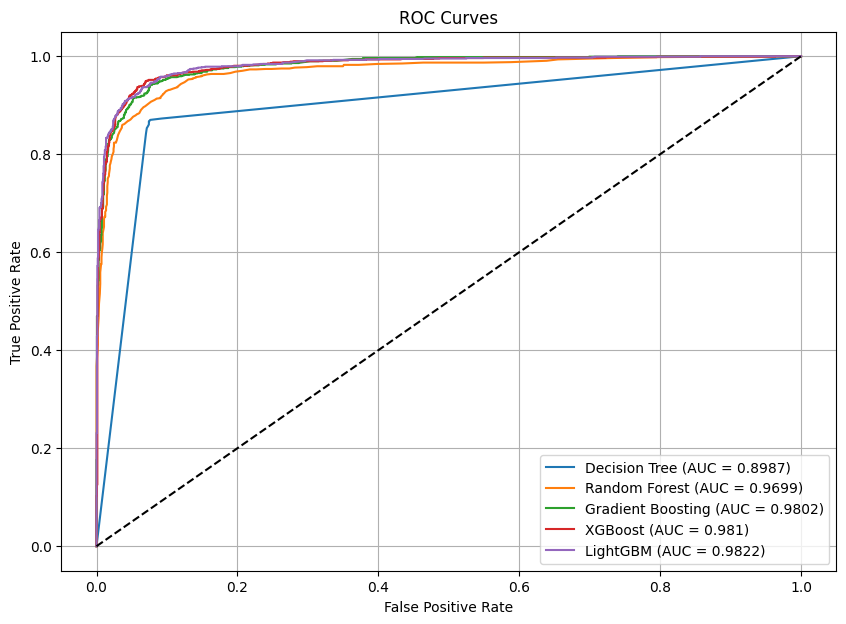

In [ ]:
# fit and evaluate all models:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

plt.figure(figsize=(10, 7))
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid()
plt.show()


**Q4:**

In this question, I used the models: Decision Tree, Random Forest, Gradient Boosting, XGBoost, and LightGBM—to predict lead conversion, evaluated them using accuracy, precision, recall, AUC, confusion matrix, and ROC curve.

**Accuracy, Precision, Recall (on test data)**

Decision Tree had an accuracy of 0.903, precision of 0.8811, and recall of 0.8672.

Random Forest had better performance with accuracy of 0.9203, precision of 0.9196, and recall of 0.8709.

Gradient Boosting improved even more with accuracy of 0.9315, precision of 0.9302, and recall of 0.8904.

XGBoost gave an accuracy of 0.9376, precision of 0.9297, and recall of 0.9081.

LightGBM gave the best results overall with an accuracy of 0.9387, precision of 0.9315, and recall of 0.909.

So, in terms of accuracy, precision, and recall, **LightGBM** performed the best, but XGBoost and Gradient Boosting were also very close.

**Confusion Matrices**: All the models showed confusion matrices with a relatively low number of false positives and false negatives. For example, LightGBM predicted 979 true positives and had 98 false negatives, which is very good. The false positives were also low, they were 72. This shows the model is making very few mistakes in predicting who will convert.

**AUC Scores and ROC Curve**: The AUC score tells how well the model separates the two classes (converted vs. not converted). So, the higher the AUC, the better model performance is.

Decision Tree had the lowest AUC at 0.8987.

Random Forest had an AUC of 0.9699.

Gradient Boosting had an AUC of 0.9802.

XGBoost had an AUC of 0.981.

**LightGBM had the highest AUC** at 0.9822.

The ROC curve also confirmed this — **LightGBM's curve was the closest** to the top left corner, showing it had the best true positive rate vs. false positive rate tradeoff.

**Finally,** based on the test results:

**LightGBM gave the best performance overall.** It had the highest accuracy, precision, recall, and AUC score. It also had the most balanced and accurate predictions based on the confusion matrix and ROC curve.